## PROJECT NAME: House Price Prediction

## OBJECTIVE: Determine housing prices based on Demographics like years,area,etc.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df=pd.read_csv("C:/Users/JAANYA RAHEJA/Downloads/HousePricePrediction.csv")

In [4]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [7]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
TotalBsmtSF     0.613581
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
BsmtFinSF2     -0.011378
Id             -0.021917
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64

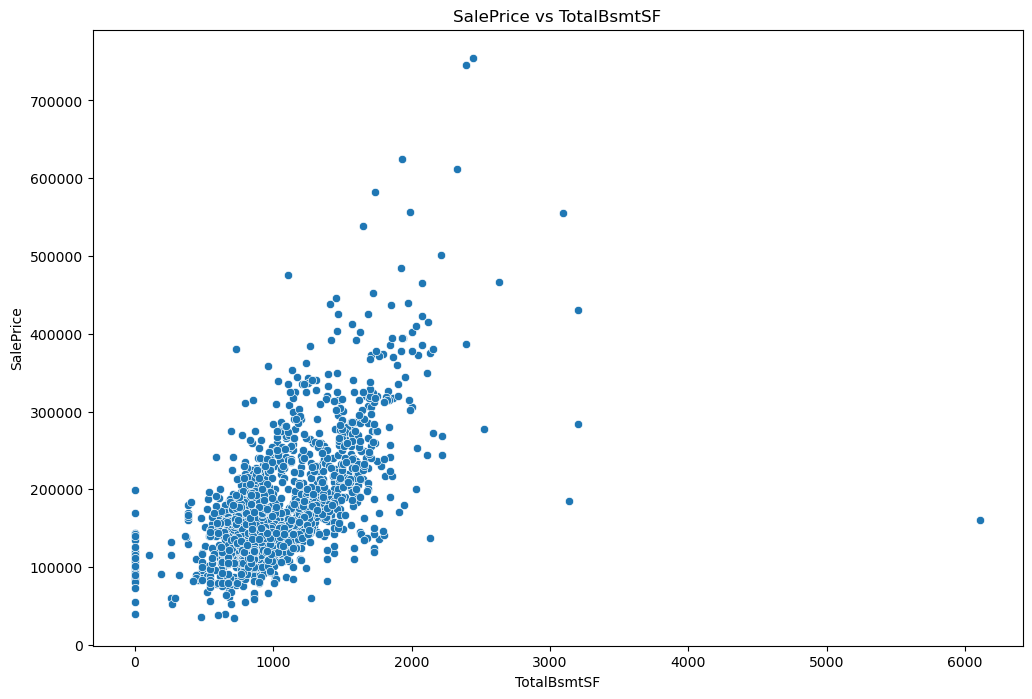

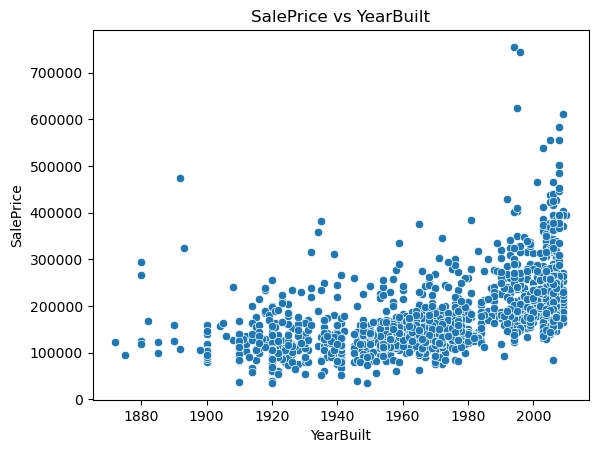

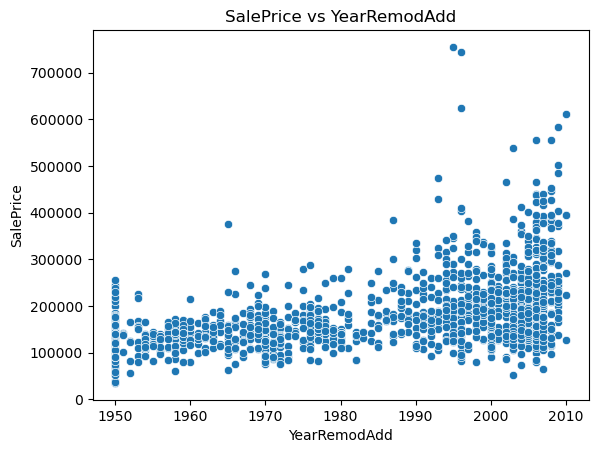

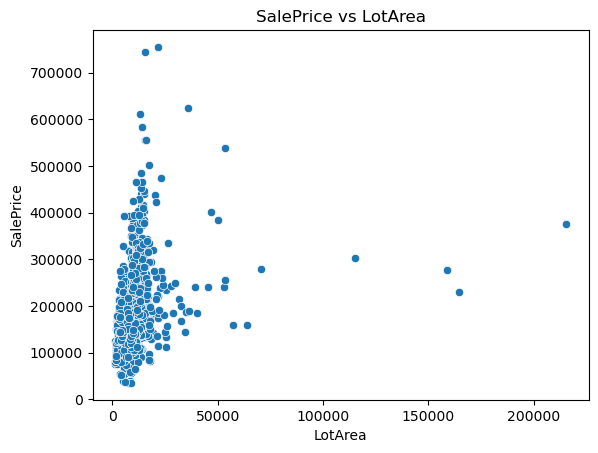

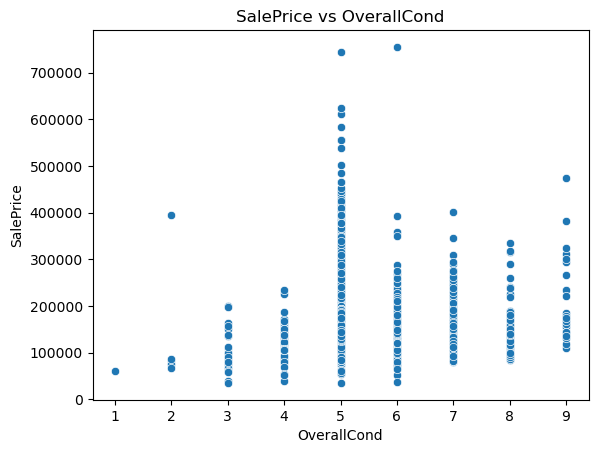

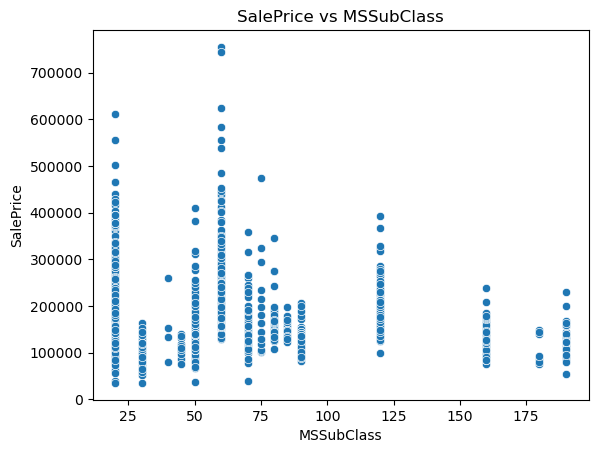

In [8]:
# Plot scatterplots for highly correlated features
plt.figure(figsize=(12, 8))
for feature in ["TotalBsmtSF", "YearBuilt", "YearRemodAdd", "LotArea", "OverallCond", "MSSubClass"]:
    sns.scatterplot(x=feature, y='SalePrice', data=df)
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [9]:
##CLEANING OUTLIERS

In [10]:
# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data):
    z_scores = (data - data.mean()) / data.std()
    return np.abs(z_scores) > 1  # Threshold of 1 standard deviations

# Apply the function to detect outliers in each numerical column
outliers = df.select_dtypes(include=np.number).apply(detect_outliers_zscore)

# Optionally, you can visualize outliers
print("Outliers:")
print(outliers)

Outliers:
        Id  MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0     True       False    False        False       True         False   
1     True       False    False         True      False         False   
2     True       False    False        False      False         False   
3     True       False    False        False       True         False   
4     True       False    False        False      False         False   
...    ...         ...      ...          ...        ...           ...   
2914  True        True     True         True      False         False   
2915  True        True     True        False      False         False   
2916  True       False     True         True      False         False   
2917  True       False    False        False      False         False   
2918  True       False    False        False      False         False   

      BsmtFinSF2  TotalBsmtSF  SalePrice  
0          False        False      False  
1          False        Fal

 ## cleaning

In [11]:
df.drop(['Id'],
             axis=1,
             inplace=True)

#because id is of no use

In [12]:
df['SalePrice'] = df['SalePrice'].fillna(
  df['SalePrice'].mean())
#replacing empty values with mean vals

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [15]:
from sklearn.preprocessing import OneHotEncoder
 
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [16]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_cols = df_final.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to numerical columns
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = df_final.drop(['SalePrice'], axis=1)
y = df_final['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Train the model
gb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.004634255164533772


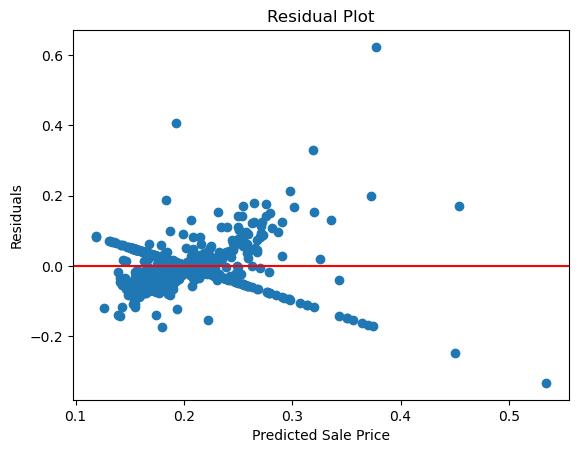

In [20]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
